# Iris - Supervised learning - Multiclass classification

---

This Notebook is to practice some ML algorithms on a well known dataset such as iris.csv.
- Note this is Supervised learning => multiclass classification problem

Will practice usage of:
- Multiclass Logistic regression => accuracy = 0.967
- Decission tree => accuracy = 0.933
- SVM => accuraccy = 0.967

Where applicable we will be calculating the following metrics:
- f1_score
- accuracy score
- confusion matrix

---

### 0. Loading, first analysis, pre-processing and wrangling of the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_iris = pd.read_csv('ML01 - Iris.csv')

In [3]:
# Understand how big is our dataset
df_iris.shape

(150, 5)

In [4]:
# Understand what is the distribution 
df_iris["variety"].value_counts() 

Virginica     50
Setosa        50
Versicolor    50
Name: variety, dtype: int64

In [5]:
# Understand how variables are stored in the dataset, their type
df_iris.dtypes

sepal.length    float64
sepal.width     float64
petal.length    float64
petal.width     float64
variety          object
dtype: object

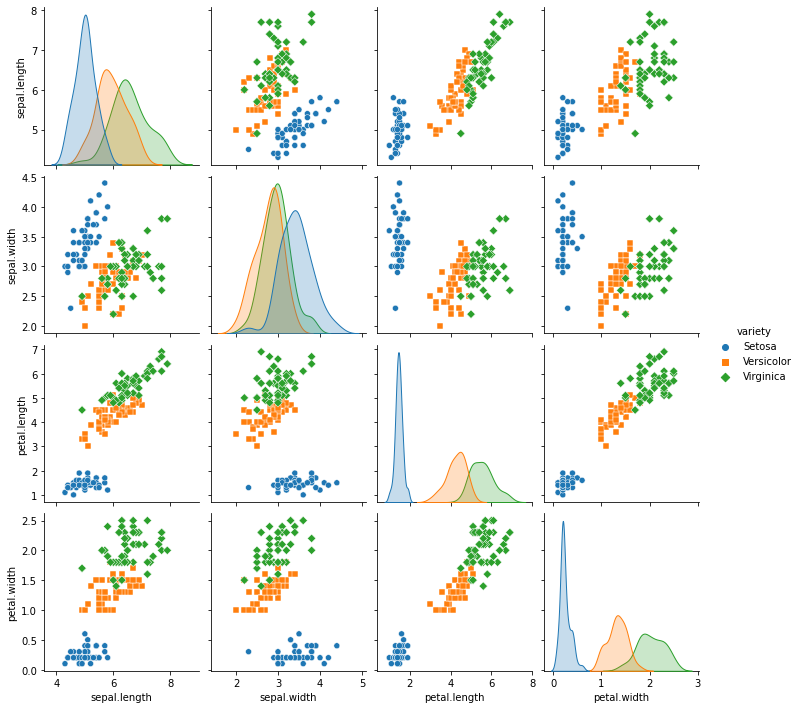

In [6]:
import seaborn as sns
sns.pairplot(df_iris, hue = 'variety', corner = False, kind = 'scatter', markers=["o", "s", "D"]);

In [7]:
# It's convenient to have the variable/label to predict "Variety" as a numeric value (int)
df_iris.replace({'Setosa':0,'Versicolor':1,'Virginica':2},inplace=True)
df_iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
# Now we have the "Variety" as an int
df_iris.dtypes

sepal.length    float64
sepal.width     float64
petal.length    float64
petal.width     float64
variety           int64
dtype: object

Once we have done this first analysis, pre-processing and wrangling of the dataset, we can build a model using different ML algorithms.

### 1. Logistic regression - Multiclass

In [9]:
# We import some methods that will be used
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [10]:
# We get the values from the dataframe and get np.arrays
iris = df_iris.to_numpy()

In [11]:
# We get in variable X all the variables data and normalize them
X = iris[:,0:4]
X = StandardScaler().fit(X).transform(X)

# Dependent variable to predict is stored in y
y = iris[:,4]

In [12]:
# We make a partition of the X and y data, to have training and test data --> we use 20% of the data for test purposes and we take them randomly with shuffle = True
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True)

In [13]:
# We create the logistic regression model for this multiclass case, and we train it 
clf = LogisticRegression(multi_class = 'multinomial', solver='lbfgs').fit(X, y)

In [14]:
# We use the model to calculate the y_hat values
y_hat = clf.predict(X_test)
y_hat

array([1., 2., 0., 1., 1., 2., 1., 1., 2., 1., 0., 0., 2., 2., 0., 1., 0.,
       1., 0., 2., 1., 2., 2., 1., 0., 0., 2., 2., 0., 0.])

In [15]:
# We calculate metrics: f1_score
f1score = f1_score(y_test,y_hat, average = 'macro').round(decimals = 3)
f1score

0.967

In [16]:
# We display confusion matrix to understand better where the model is working better/worst 
# Remember that 0 = Setosa / 1 = Vesicolor / 2 = Virginica
# Also remember a) that the diagonal shows the well classified cases b) in axis Y we have true label values and X we have predicted label values
cm = confusion_matrix(y_test, y_hat)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  1, 10]], dtype=int64)

Note that the partition of the data is random each time we run the code. Therefore training data and test data are different each time we run the code and as a consequence the metrics may differ slightly each time.

In [17]:
# Note that by default, the prediction is taking the label that has more probabilities.
# By extracting the probabilities calculated using the model, we could see furthermore where the model is more confident and in which cases.
y_hat_prob = clf.predict_proba(X_test)
print(y_hat_prob)

[[1.58969240e-02 8.27470368e-01 1.56632708e-01]
 [1.09200482e-05 3.55401162e-02 9.64448964e-01]
 [9.58761743e-01 4.12380758e-02 1.81624529e-07]
 [7.05733307e-02 9.20886334e-01 8.54033512e-03]
 [1.75817724e-02 7.17150222e-01 2.65268005e-01]
 [3.28489745e-04 1.57215276e-01 8.42456235e-01]
 [1.98031376e-03 5.84009480e-01 4.14010207e-01]
 [1.70379046e-02 9.41035471e-01 4.19266240e-02]
 [1.29866021e-04 1.33505750e-01 8.66364384e-01]
 [5.35668405e-02 7.50114873e-01 1.96318286e-01]
 [9.70477748e-01 2.95221308e-02 1.21034033e-07]
 [9.47191228e-01 5.28081926e-02 5.78948345e-07]
 [6.30755932e-04 1.62104590e-01 8.37264654e-01]
 [1.68112761e-08 2.34912795e-03 9.97650855e-01]
 [9.88280482e-01 1.17193982e-02 1.19933020e-07]
 [2.66351431e-03 7.52697678e-01 2.44638808e-01]
 [9.72815815e-01 2.71837700e-02 4.15212397e-07]
 [8.62776245e-02 8.87860465e-01 2.58619110e-02]
 [9.87543838e-01 1.24561147e-02 4.68552926e-08]
 [1.56436922e-04 2.97789811e-01 7.02053752e-01]
 [1.63247209e-02 9.32027563e-01 5.164771

Since we are dealing with a multiclass classification problem, we can't calculate ROC AUC.

### 2. Decision tree

In [18]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [19]:
DT = tree.DecisionTreeClassifier(criterion="entropy",max_depth=4)
DT = DT.fit(X_train,y_train)
    
# Predicted values from X_test
y_hat = DT.predict(X_test)
    
print("DecisionTrees's f1_score: ", f1_score(y_test,y_hat, average = 'macro'))
DT_accuracy = accuracy_score(y_test,y_hat).round(decimals = 3)
print('DT_accuracy_score = ', DT_accuracy)

cm = confusion_matrix(y_test, y_hat)
print(cm)
    
cmfor0 = cm[0,0]/np.sum(cm[0,]); print(cmfor0)
cmfor1 = cm[1,1]/np.sum(cm[1,]); print(cmfor1)

DecisionTrees's f1_score:  0.9333333333333332
DT_accuracy_score =  0.933
[[10  0  0]
 [ 0  9  0]
 [ 0  2  9]]
1.0
1.0


We plot the decision tree:

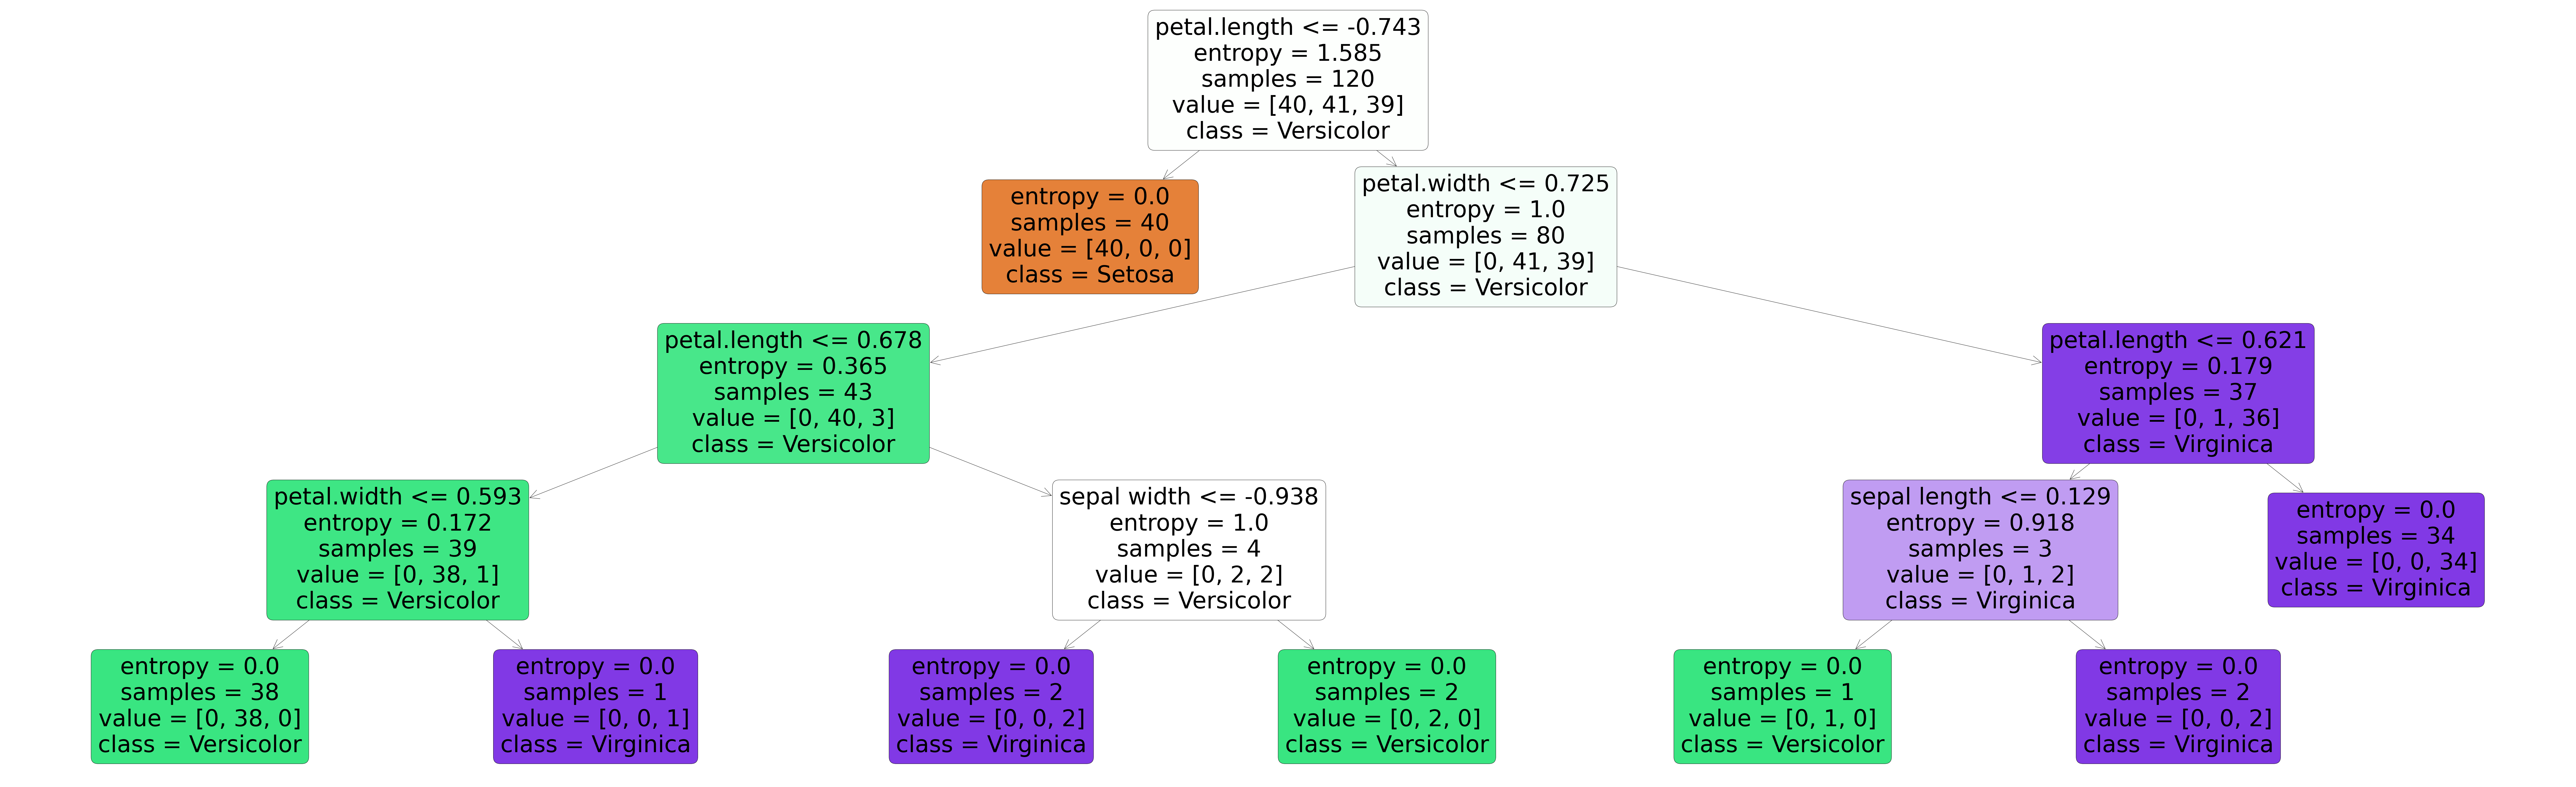

In [20]:
from sklearn.tree import plot_tree
plt.figure(figsize=(160,50))
a = plot_tree(DT,
              class_names=['Setosa','Versicolor','Virginica'],
              feature_names=['sepal length','sepal width','petal.length','petal.width'],
              filled=True, 
              rounded=True, 
              fontsize=80)

### 3. SVM

In [21]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [22]:
SVM = SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(X_train, y_train)

In [23]:
y_hat = SVM.predict(X_test)

In [24]:
SVM_accuracy = accuracy_score(y_test,y_hat).round(decimals = 3)
print('SVM_accuracy_score = ', SVM_accuracy)

SVM_accuracy_score =  0.967
